<a href="https://colab.research.google.com/github/nazrulislam3626/Credit-Risk-Prediction-using-Machine-Learning-Models/blob/main/Project_1_Risk_prediction_with_tree_classifiers(DL_%26_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **Project 1: A Comparative Analysis of Deep Learning and Machine Learning Models for Classification and Regression Using CSV/Excel Data**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading and Preprocessing

    Load the dataset from both CSV and Excel files using Pandas.

    Display the first 5 rows and basic dataset info (.head(), .info(), .describe()).

    Check for missing values and handle them (drop, fill, or impute).


In [ ]:
# loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/alicenkbaytop/German-Credit-Risk-Classification/refs/heads/master/german_credit_risk.csv')

# Description and Meaning of the Values:

1. Age: Age of the person applying for the credit.

2. Sex: Gender of the person applying for the credit.

3. Job: 0,1,2,3 The values specified for the job in the form of 0,1,2,3.

4. Housing: own, rent or free.

5. Saving accounts: the amount of money in the person's
  bank account.

6. Checking account: cheque account.

7. Credit amount: Credit amount.

8. Duration: Time given for credit payment.

9. Purpose: Goal of credit application.

10. Risk: Credit application positive or negative.



In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


In [ ]:
# Check for missing values and handle them (drop, fill, or impute)
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [ ]:
# drop unnamed column if it exists
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
# using for loop: imputing missing value (strategy = mode)
for col in ['Saving accounts', 'Checking account']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# **2. Data Cleaning and Feature Engineering (10 Marks)**

  Identify duplicate rows and remove them.

  Convert categorical variables into numerical if needed (using LabelEncoder or OneHotEncoding) (male =1 & female = 0) and (good =1 & bad = 0)

  Normalize/scale numerical features if necessary.


In [ ]:
# Identify duplicate rows and remove them.
df.duplicated().sum()

np.int64(0)

In [ ]:
# Convert categorical variables into numerical if needed (using LabelEncoder or OneHotEncoding).
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Sex"]=label.fit_transform(df["Sex"])
df["Risk"]=label.fit_transform(df["Risk"])

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,little,little,1169,6,radio/TV,1
1,22,0,2,own,little,moderate,5951,48,radio/TV,0
2,49,1,1,own,little,little,2096,12,education,1
3,45,1,2,free,little,little,7882,42,furniture/equipment,1
4,53,1,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,own,little,little,1736,12,furniture/equipment,1
996,40,1,3,own,little,little,3857,30,car,1
997,38,1,2,own,little,little,804,12,radio/TV,1
998,23,1,2,free,little,little,1845,45,radio/TV,0


# **3. Data Visualization** Req # 4
  Univariate Analysis: Plot bar
  charts, histograms, and pie charts to analyze individual features.

  Bivariate Analysis: Create scatter plots, pair plots, or violin plots to explore relationships.

  Multivariate Analysis: Use heatmaps and correlationmatrices to identify patterns.

  Custom Visualization: Provide one insightful visualization of your choice.


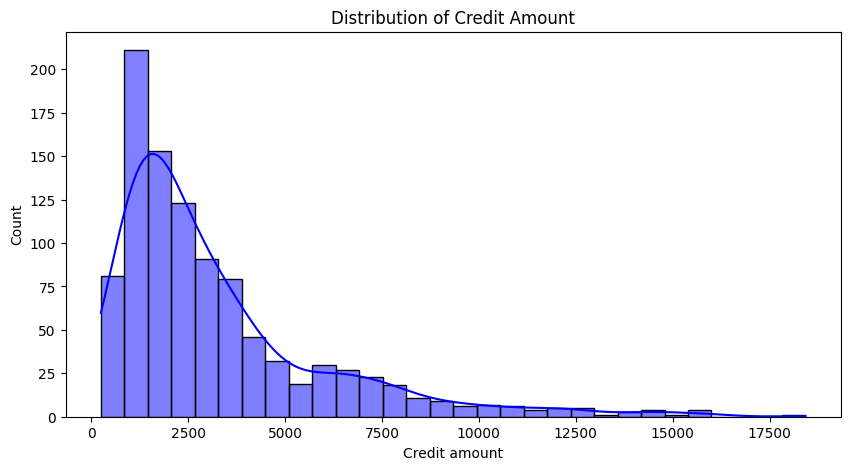

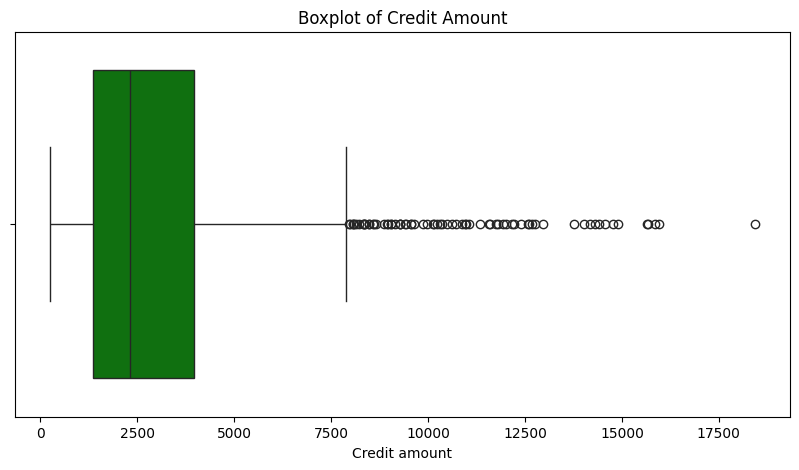

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Credit amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Credit Amount')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Credit amount'], color='green')
plt.title('Boxplot of Credit Amount')
plt.show()

# It shows that the distruction is right squed distribution

In [ ]:
df.value_counts('Purpose')

,count
Purpose,
1,337
5,280
4,181
0,97
3,59
6,22
2,12
7,12


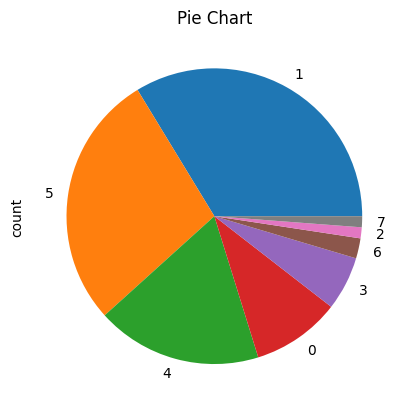

In [ ]:
# show pai chart for purpose
df["Purpose"].value_counts().plot(kind="pie")
tittl="Pie Chart"
plt.title(tittl)
plt.show()

In [ ]:
df.value_counts('Housing')

,count
Housing,
1,713
2,179
0,108


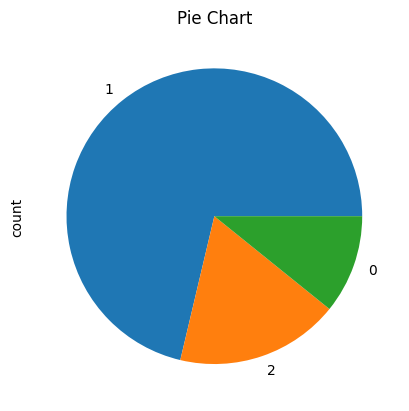

In [ ]:
# show pie chart housing
df["Housing"].value_counts().plot(kind="pie")
tittl="Pie Chart"
plt.title(tittl)
plt.show()

In [ ]:
df.value_counts('Duration')

,count
Duration,
24,184
12,179
18,113
36,83
6,75
15,64
9,49
48,48
30,40


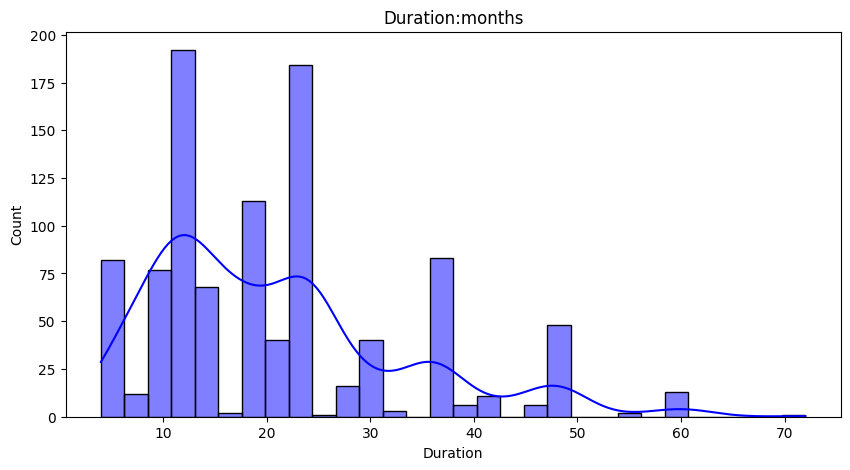

In [ ]:
# show distribution of duration
plt.figure(figsize=(10,5))
sns.histplot(df['Duration'], bins=30, kde=True, color='blue')
plt.title('Duration:months')
plt.show()

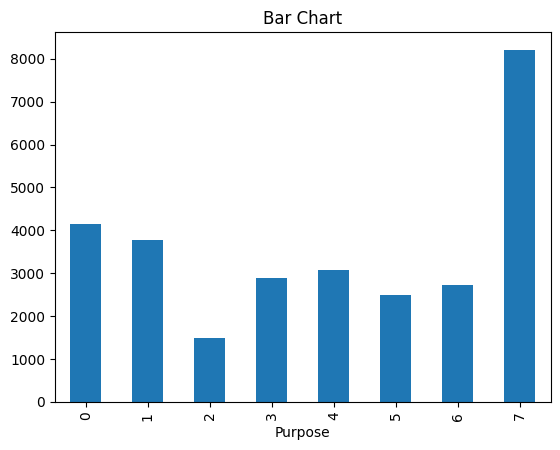

In [ ]:
# show bar chart the purpose and credit amount
df.groupby("Purpose")["Credit amount"].mean().plot(kind="bar")
tittl="Bar Chart"
plt.title(tittl)
plt.show()

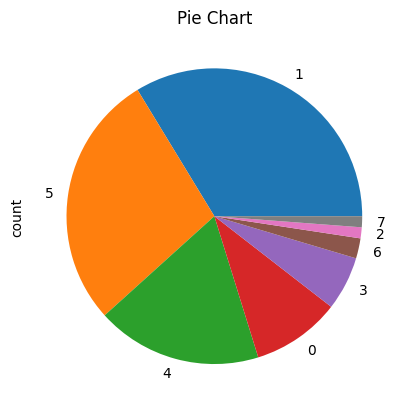

In [ ]:
# show pie chart
df["Purpose"].value_counts().plot(kind="pie")
tittl="Pie Chart"
plt.title(tittl)
plt.show()

In [ ]:
pd.crosstab(df["Sex"],df["Risk"])

Risk,0,1
Sex,,
0,109,201
1,191,499


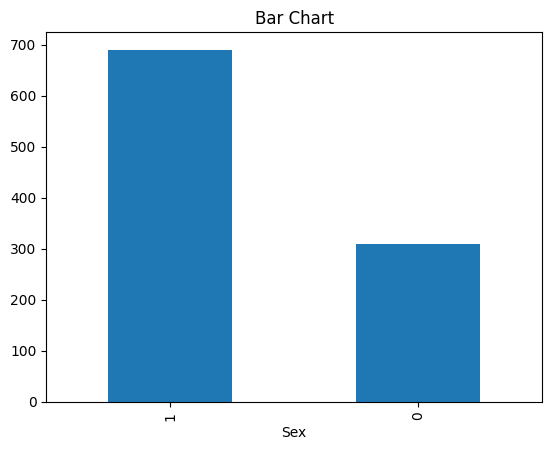

In [ ]:
# custome visilization : show plot bar
df["Sex"].value_counts().plot(kind="bar")
tittl="Bar Chart"
plt.title(tittl)
plt.show()

In [ ]:
pd.crosstab(df["Housing"],df["Risk"])

Risk,0,1
Housing,,
free,44,64
own,186,527
rent,70,109


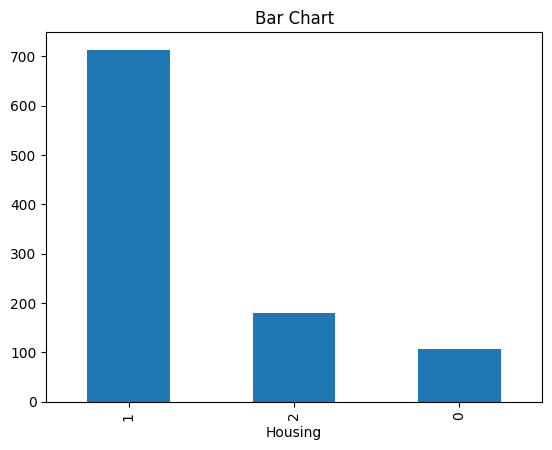

In [ ]:
# custome visulization show histograms, and pie charts
df["Housing"].value_counts().plot(kind="bar")
tittl="Bar Chart"
plt.title(tittl)
plt.show()

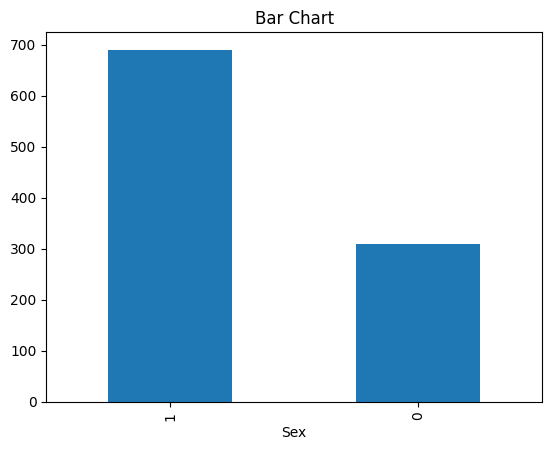

In [ ]:
# Univariate Analysis: Plot bar charts, histograms, and pie charts to analyze individual features.
# show Plot bar charts
df["Sex"].value_counts().plot(kind="bar")
tittl="Bar Chart"
plt.title(tittl)
plt.show()


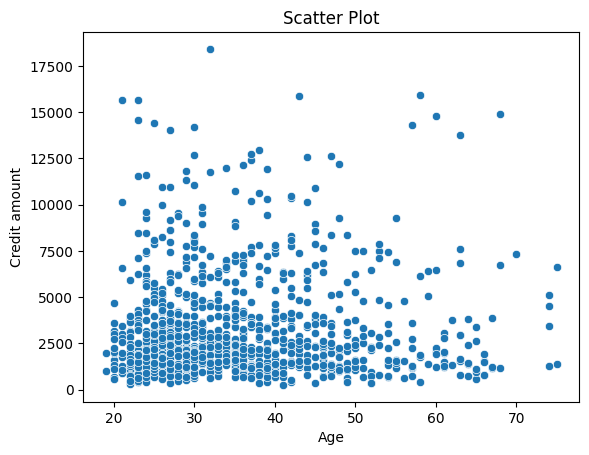

In [ ]:
# Bivariate Analysis:
# show scatter plots
sns.scatterplot(x="Age", y="Credit amount", data=df)
tittl="Scatter Plot"
plt.title(tittl)
plt.show()

In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

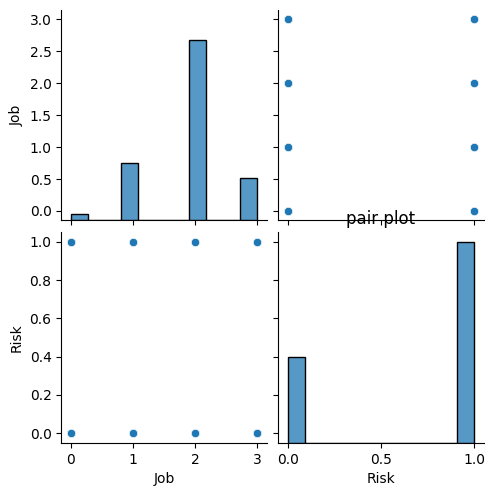

In [ ]:
# show pair plots of Job', 'Housing','Risk'
sns.pairplot(df[["Job", "Housing", "Risk"]])
tittl="pair plot"
plt.title(tittl)
plt.show()



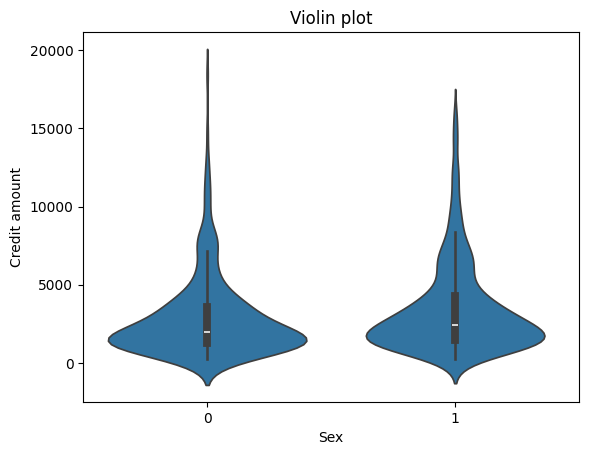

In [ ]:
# show violin plots to explore relationships
sns.violinplot(x="Sex", y="Credit amount", data=df)
tittl="Violin plot"
plt.title(tittl)
plt.show()


In [ ]:
correlation = df.corr()
important_features = correlation['Risk'].sort_values(ascending=False)
print("Top correlated features:\n", important_features)

Top correlated features:
 Risk                1.000000
Saving accounts     0.102751
Age                 0.091127
Sex                 0.075493
Purpose             0.061145
Housing            -0.019315
Job                -0.032735
Checking account   -0.052375
Credit amount      -0.154739
Duration           -0.214927
Name: Risk, dtype: float64


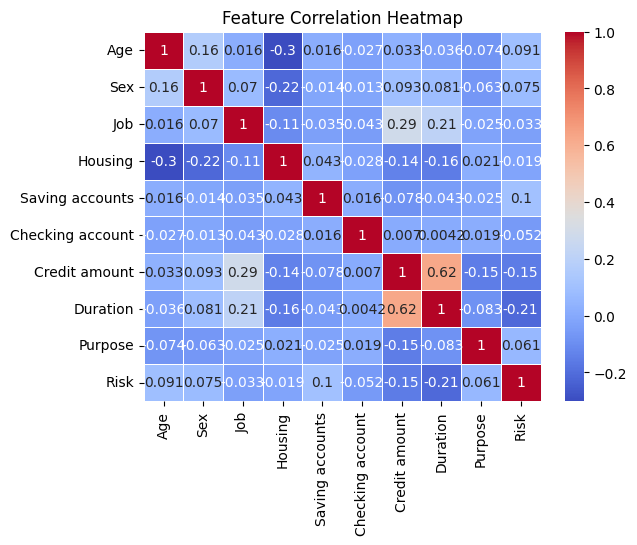

In [ ]:
# show in sns heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
tittl="Feature Correlation Heatmap"
plt.title(tittl)
plt.show()

# **3. Classification  and Regression**   
  Train-test split.

  Trained model save to google drive.

  All evaluation metrics (Accuracy,
  ROC, AUC, Confusion Metrix, F1-Score, recall, precision ).
  
  After comparison all models, Finally proposed a model and a trained file with minimum 3 reasons.


In [ ]:
# Train-test split.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# # 4. Feature Selection
x = df.drop(columns=['Risk'])  # Assming 'Risk' is the target variable
y = df['Risk']

In [ ]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,own,little,little,1169,6,radio/TV
1,22,0,2,own,little,moderate,5951,48,radio/TV
2,49,1,1,own,little,little,2096,12,education
3,45,1,2,free,little,little,7882,42,furniture/equipment
4,53,1,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,0,1,own,little,little,1736,12,furniture/equipment
996,40,1,3,own,little,little,3857,30,car
997,38,1,2,own,little,little,804,12,radio/TV
998,23,1,2,free,little,little,1845,45,radio/TV


In [ ]:
y

,Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [ ]:
# correlation based feature selection

# Convert remaining categorical columns to numerical using LabelEncoder
for col in ['Housing', 'Saving accounts', 'Checking account', 'Purpose']:
    if col in df.columns:
        df[col] = label.fit_transform(df[col])

# Redefine x and y after all categorical columns have been encoded
x = df.drop(columns=['Risk'])
y = df['Risk']
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
 9   Risk              1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [ ]:
#### Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
# using RFE
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=8)
fit = rfe.fit(x, y)
selected_features = x.columns[fit.support_]
print("Selected Features using RFE:", selected_features)

Selected Features using RFE: Index(['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


### Visualizing RFE Selected Features

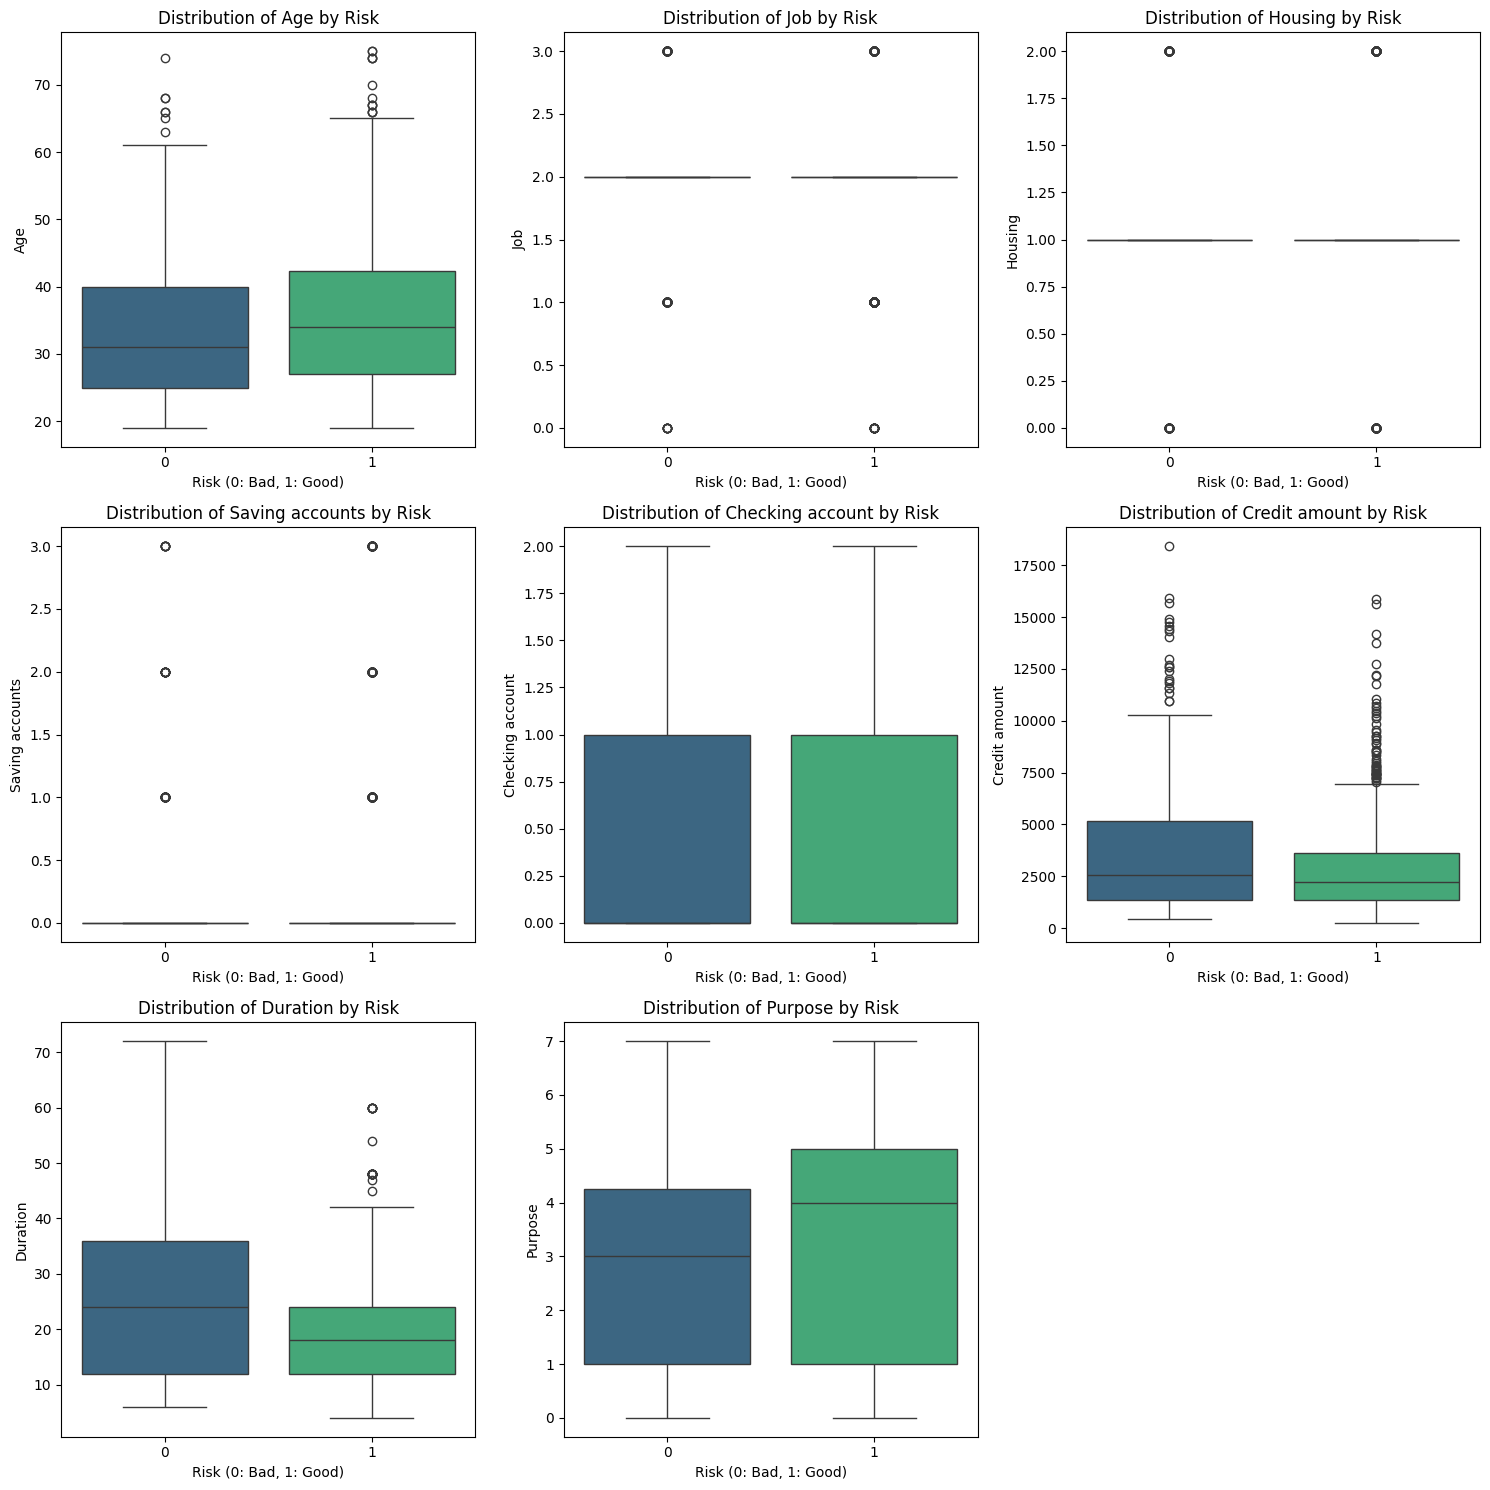

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine selected features and 'Risk' for easier plotting
plot_df = df[list(selected_features) + ['Risk']]

# Set up the plot aesthetics
plt.figure(figsize=(15, 15)) # Increased figure size to better accommodate a 3x3 grid
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i) # Adjusted grid size to 3 rows and 3 columns
    sns.boxplot(x='Risk', y=feature, data=plot_df, palette='viridis')
    plt.title(f'Distribution of {feature} by Risk')
    plt.xlabel('Risk (0: Bad, 1: Good)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Train-test split.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(800, 9)

In [ ]:
X_test.shape

(100, 9)

In [ ]:
y_train.shape

(800,)

In [ ]:
y_test.shape

(100,)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
model1 = clf.fit(X_train, y_train)

In [ ]:
# Classfication
y_pred = model1.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0])

In [ ]:
y_pred.shape

(200,)

# Data Augmentation
It is technique of increasing training set by creating modified copies of dataset using existing samples.

In [ ]:
# classes are imbalanced class
df['Risk'].value_counts()

,count
Risk,
1,700
0,300


<Axes: xlabel='Risk'>

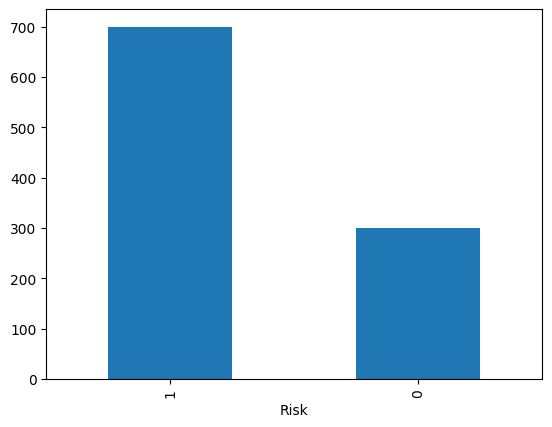

In [ ]:
# show the risk value
df['Risk'].value_counts().plot(kind='bar')

# Value count shows imbalance of outcomes(risk)

In [ ]:
# ALL models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import time
import pandas as pd # Make sure pandas is imported

In [ ]:
!pip install pandas --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
# 'Risk' is the column I want to predict
X = df.drop(columns=['Risk'])  # Ensure X is derived from the fully processed df
y = df['Risk']                 # Ensure y is derived from the fully processed df

# Split the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines': SVC(),
    'Linear SVC': LinearSVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(),
    'Stochastic Gradient Descent': SGDClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
}

# Initialize an empty list to store the results
results_list = []

# Training and evaluating the models
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)

    # Training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

    # Testing set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_recall = recall_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)

    # Store results in the list
    results_list.append({
        'Model': model_name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Validation Accuracy': val_accuracy,
        'CPU times': time.time() - start_time,
        'MSE': val_mse,
        'Precision': train_precision,
        'Recall': train_recall,
        'F1 Score': train_f1
    })

# Convert list to DataFrame
results_df = pd.DataFrame(results_list)


results_df

,Model,Training Accuracy,Testing Accuracy,Validation Accuracy,CPU times,MSE,Precision,Recall,F1 Score
0,Logistic Regression,0.70750,0.73,0.69,0.243915,0.31,0.670612,0.70750,0.645855
1,Support Vector Machines,0.70750,0.70,0.73,0.163152,0.27,0.679991,0.70750,0.619419
2,Linear SVC,0.71125,0.73,0.70,0.045401,0.30,0.680411,0.71125,0.643195
3,k-Nearest Neighbors,0.75500,0.65,0.71,0.053194,0.29,0.741649,0.75500,0.742393
4,Naive Bayes,0.70250,0.68,0.66,0.039492,0.34,0.674819,0.70250,0.677999
5,Perceptron,0.69875,0.69,0.72,0.042000,0.28,0.488252,0.69875,0.574836
6,Stochastic Gradient Descent,0.69875,0.69,0.72,0.042172,0.28,0.488252,0.69875,0.574836
7,Decision Tree Classifier,1.00000,0.56,0.67,0.046499,0.33,1.000000,1.00000,1.000000
8,Random Forest,1.00000,0.72,0.69,0.471563,0.31,1.000000,1.00000,1.000000
9,XGBClassifier,0.99625,0.66,0.74,0.155939,0.26,0.996270,0.99625,0.996243


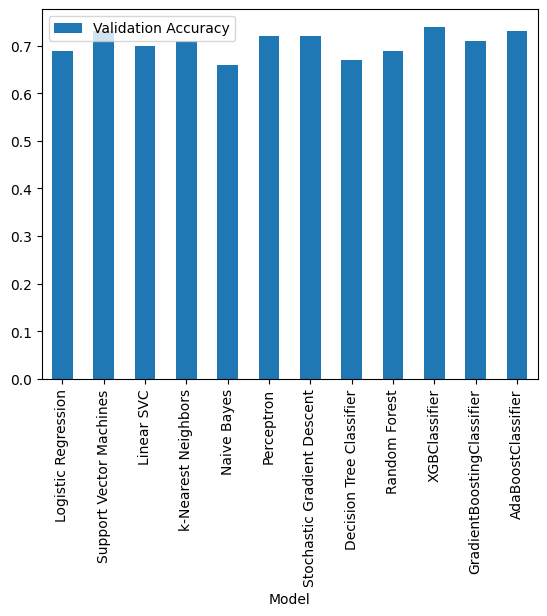

In [ ]:
# show the results_df in suitable graph
results_df.plot(x='Model', y='Validation Accuracy', kind='bar')
plt.show()

In [ ]:
# Sort models by Validation Accuracy and display Precision and Recall for the top models
top_models = results_df.sort_values(by='Validation Accuracy', ascending=False).head(3)
display(top_models[['Model', 'Validation Accuracy', 'Precision', 'Recall']])

,Model,Validation Accuracy,Precision,Recall
9,XGBClassifier,0.74,0.996270,0.99625
1,Support Vector Machines,0.73,0.679991,0.70750
11,AdaBoostClassifier,0.73,0.729089,0.73875


In [ ]:
# Display Precision and Recall for all models
display(results_df[['Model', 'Precision', 'Recall']])

,Model,Precision,Recall
0,Logistic Regression,0.670612,0.70750
1,Support Vector Machines,0.679991,0.70750
2,Linear SVC,0.680411,0.71125
3,k-Nearest Neighbors,0.741649,0.75500
4,Naive Bayes,0.674819,0.70250
5,Perceptron,0.488252,0.69875
6,Stochastic Gradient Descent,0.488252,0.69875
7,Decision Tree Classifier,1.000000,1.00000
8,Random Forest,1.000000,1.00000
9,XGBClassifier,0.996270,0.99625


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.16      0.25        31
           1       0.71      0.94      0.81        69

    accuracy                           0.70       100
   macro avg       0.63      0.55      0.53       100
weighted avg       0.67      0.70      0.64       100



<Axes: >

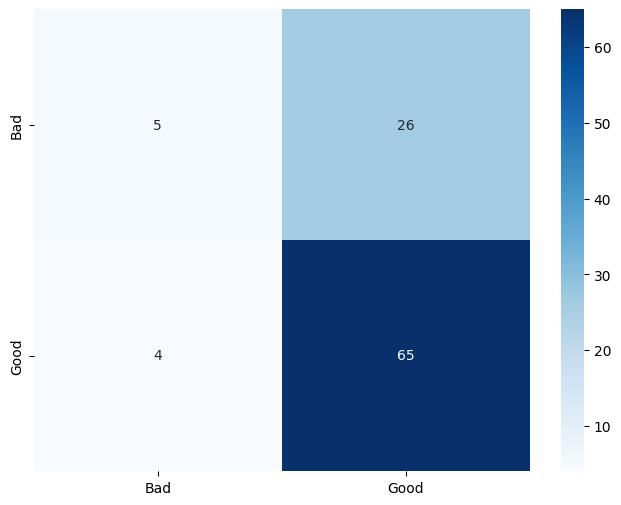

In [ ]:
# show in confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])

### Proposed Model: XGBClassifier

Based on the evaluation metrics, the **XGBClassifier** is proposed as the best model for this classification task. Here are the reasons:

1.  **Highest Validation Accuracy:** The XGBClassifier achieved the highest validation accuracy (0.74) among all the models. This indicates its superior ability to generalize to unseen data.
2.  **Robustness and Performance:** XGBoost is a highly efficient and flexible gradient boosting library. It is well-known for its high performance in a wide range of machine learning tasks and its ability to handle complex datasets while being resistant to overfitting (compared to simpler models).
3.  **Feature Importance for Interpretability:** XGBoost intrinsically provides feature importance scores, which can be valuable for understanding which features contribute most to the model's predictions. This aids in model interpretability and potentially in further feature engineering.


In [ ]:
import joblib
from xgboost import XGBClassifier

# Re-initialize and train the best model (XGBClassifier) on the full training set
final_model = XGBClassifier(random_state=42) # Using default parameters or tuned if available
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
final_y_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_y_pred)
print(f"Final XGBClassifier Accuracy on Test Set: {final_accuracy:.4f}")



Final XGBClassifier Accuracy on Test Set: 0.6600


In [ ]:
# Save the trained model to a file
model_filename = 'xgb_final_model.joblib'
joblib.dump(final_model, model_filename)
print(f"Trained XGBClassifier model saved as '{model_filename}'")

Trained XGBClassifier model saved as 'xgb_final_model.joblib'
